In [1]:
import os
import tensorflow as tf 
import matplotlib.pylab as plt 
import warnings
warnings.filterwarnings("ignore")

# tf.debugging.set_log_device_placement(True)

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

2023-07-20 13:24:13.523237: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-20 13:24:13.551871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 13:24:14.029957: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# tf.sysconfig.get_build_info()['cuda_version']
# os.system("nvcc --version")

# with tf.device('/device:GPU:0'):
# Create some tensors
# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)

# print(c)

In [3]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


2023-07-20 13:24:14.786429: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-20 13:24:14.806069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-20 13:24:14.806368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Derivatives 

To implement the derivatives in 
- JAX
- PyTorch
- Tensorflow

In [4]:
@tf.function
def target(inputs, amplitude):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(inputs)
        out = amplitude * tf.sin(inputs)
    grads = tape.gradient(out, inputs)
    return out, grads

In [5]:
xmin = 0.0 
xmax = 4.0 * 3.1412
nx = 1000
x = tf.linspace(xmin, xmax, nx)

2023-07-20 13:24:14.816002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-20 13:24:14.816461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-20 13:24:14.816806: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
amplitude = tf.constant([5.0])

In [7]:
%%time
y, dy_dx = target(x, amplitude)

CPU times: user 30.3 ms, sys: 5.21 ms, total: 35.5 ms
Wall time: 35.1 ms


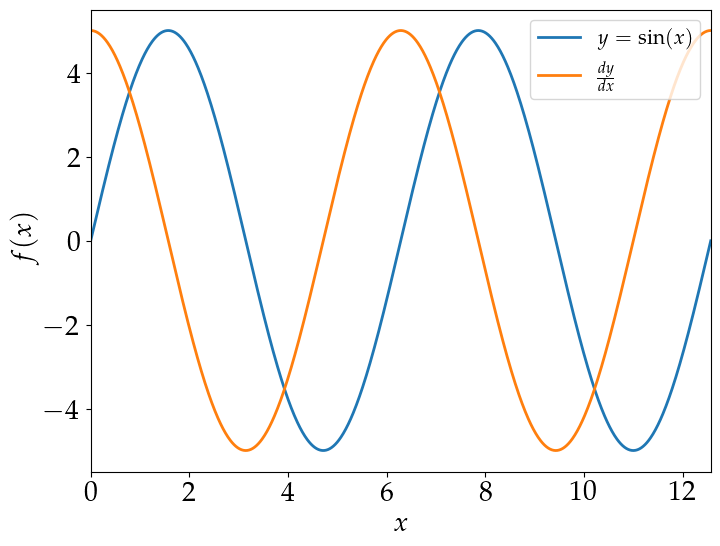

In [8]:
plt.figure(figsize=(8,6))
plt.plot(x.numpy(), y.numpy(), lw = 2, label = r'$y=\textrm{sin}(x)$')
plt.plot(x.numpy(), dy_dx.numpy(), lw = 2, label = r'$\frac{dy}{dx}$')
plt.xlim(xmin, xmax)
plt.ylabel(r'$f(x)$', fontsize = fontSize)
plt.xlabel(r'$x$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()